In [2]:
# 
# A quantum circuit is composed by quantum and classical bits in Qiskit.
#

# here are the objects that we use to create a quantum circuit in qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# we use a quantum register to keep our quantum bits.
q =  QuantumRegister(1,"qreg") # in this example we will use a single quantum bit
# the second parameter is optional

# To retrieve an information from a quantum bit, it must be measured. (More details will appear.)
#     The measurement result is stored classically.
#     Therefore, we also use a classical regiser with classical bit(s)
c = ClassicalRegister(1,"creg") # in this example we will use a single classical bit
# the second parameter is optional

# now we can define our quantum circuit
# it is composed by a quantum and a classical registers
qc = QuantumCircuit(q,c)

# we apply operators on quantum bits
# operators are called as gates
# we apply NOT operator represented as "x" in qiskit
# operator is a part of the circuit, and we should specify the quantum bit as its parameter
qc.x(q[0]) # (quantum) bits are enumerated starting from 0
# NOT operator or x-gate is applied to the first qubit of the quantum register

# measurement is defined by associating a quantum bit to a classical bit
qc.measure(q[0],c[0])
# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we run our codes until now, and then draw our circuit
print("The design of the circuit is done.")

The design of the circuit is done.


In [3]:
# in Qiskit, the circuit object has a method called "draw"
# the default drawing method uses ASCII art

# let's draw our circuit now 
qc.draw()

# re-execute this cell if you DO NOT see the circuit diagram

┌───┐┌─┐
qreg_0: ┤ X ├┤M├
        └───┘└╥┘
creg_0: ══════╩═

In [4]:
# we use the method "execute" and the object "Aer" from qiskit library
from qiskit import execute, Aer

# we create a job object for execution of the circuit
# there are three parameters
#     1. mycircuit
#     2. beckend on which it will be executed: we will use local simulator
#     3. how many times it will be executed, by default it is 1024
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

{'1': 1024}


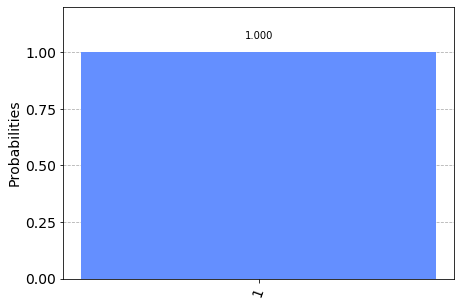

In [5]:
# we can show the result by using histogram as follows
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [6]:
#print qasm code of our program
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qreg[1];
creg creg[1];
x qreg[0];
measure qreg[0] -> creg[0];



In [7]:
# 
# A quantum circuit with four quantum and classical bits 
#

# import all objects and methods at once
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define quantum and classical registers and then quantum circuit
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first quantum bit twice
qc2.x(q2[0])
qc2.x(q2[0])

# apply x-gate to the fourth quantum bit once
qc2.x(q2[3])

# apply x-gate to the third quantum bit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])

# apply x-gate to the second quantum bit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

# define a barrier (for a better visualization)
qc2.barrier()

# if the sizes of quantum and classical registers are the same, we can define measurements with a single line of code
qc2.measure(q2,c2)
# then quantum bits and classical bits are associated with respect to their indices

# run the codes until now, and then draw our circuit
print("The design of the circuit is done.")

The design of the circuit is done.


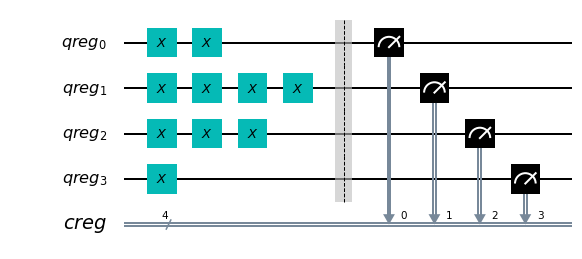

In [8]:
qc2.draw(output='mpl')
# re-execute this cell if the circuit diagram does not appear

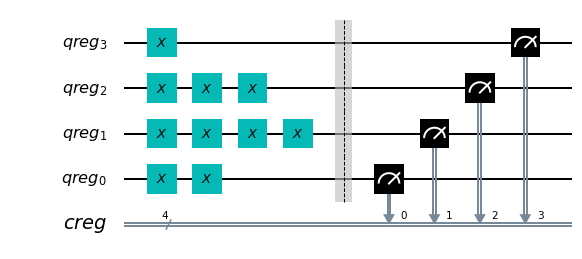

In [9]:
# by seting parameter "reverse_bits" to "True", the order of quantum bits are reversed when drawing

qc2.draw(output='mpl',reverse_bits=True)
# re-execute this cell if the circuit diagram does not appear

In [10]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc2)
print(counts)

{'1100': 100}


In [11]:
from random import randrange
n = 20
r=randrange(n) # pick a number from the list {0,1,...,n-1}
print(r)

# test this method by using a loop
for i in range(10):
    print(randrange(n))

3
14
11
3
8
5
6
2
3
19
17


In [12]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# we use 8 qubits and 8 classical bits
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)

# we store the index of each qubit to which x-gate is applied
picked_qubits=[] 

for i in range(8):
    if randrange(2) == 0: # Assume that 0 is Head and 1 is Tail
        qc.x(q[i]) # apply x-gate
        print("x-gate is applied to the qubit with index",i)
        picked_qubits.append(i) # i is picked

# define a barrier
qc.barrier()

# measurement 
qc.measure(q,c)  

# draw the circuit

#mycircuit.draw(reverse_bits=True)
qc.draw(output='mpl',reverse_bits=True)  # execute the circuit and read the results
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=128)

counts = job.result().get_counts(qc)
        
print(counts)

x-gate is applied to the qubit with index 1
x-gate is applied to the qubit with index 2
x-gate is applied to the qubit with index 3
x-gate is applied to the qubit with index 5
{'00101110': 128}
